# 1. Importing Libraries
* Importing all the required dependencies for the model.

In [1]:
# Importing libraries
import os
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Importing scikit-learn preprocessing libraries
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Importing catboost and xgboost modeling libraries
from catboost import CatBoostClassifier
import xgboost as xgb

# 2. Importing Data Files
* Reading the `train.csv` and `test.csv file` from the given data path `/kaggle/input/spaceship-titanic/train.csv` and `/kaggle/input/spaceship-titanic/test.csv` loading it into variable X and X_test, using pd.read_csv as DataFrame.
* Calculating number of non-null values and data-type of every column in `X`, using `.info()`.

In [2]:
# Read train Data file from the path
X = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
X.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [3]:
# Print shape of the data frame
X.shape

(165034, 14)

In [4]:
# Checking non-null values and dtype of each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
# Calculating null values in each column
X.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 3. Visualizing the Raw Data
* Listing down all the column names in `X`.
* Getting Descriptive analysis of `X` using `.describe()` and visualizing using `.hist()`.
* Ploting a bar-graph of the target variable `Exited`.
* Visualizing all Catagorical and Numerical columns through bar-graphs and line charts respectively.
* Comparing number of active and non-active customers based on their Gender and Geography.

In [6]:
# Feature Data Columns
X.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Data description
X.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


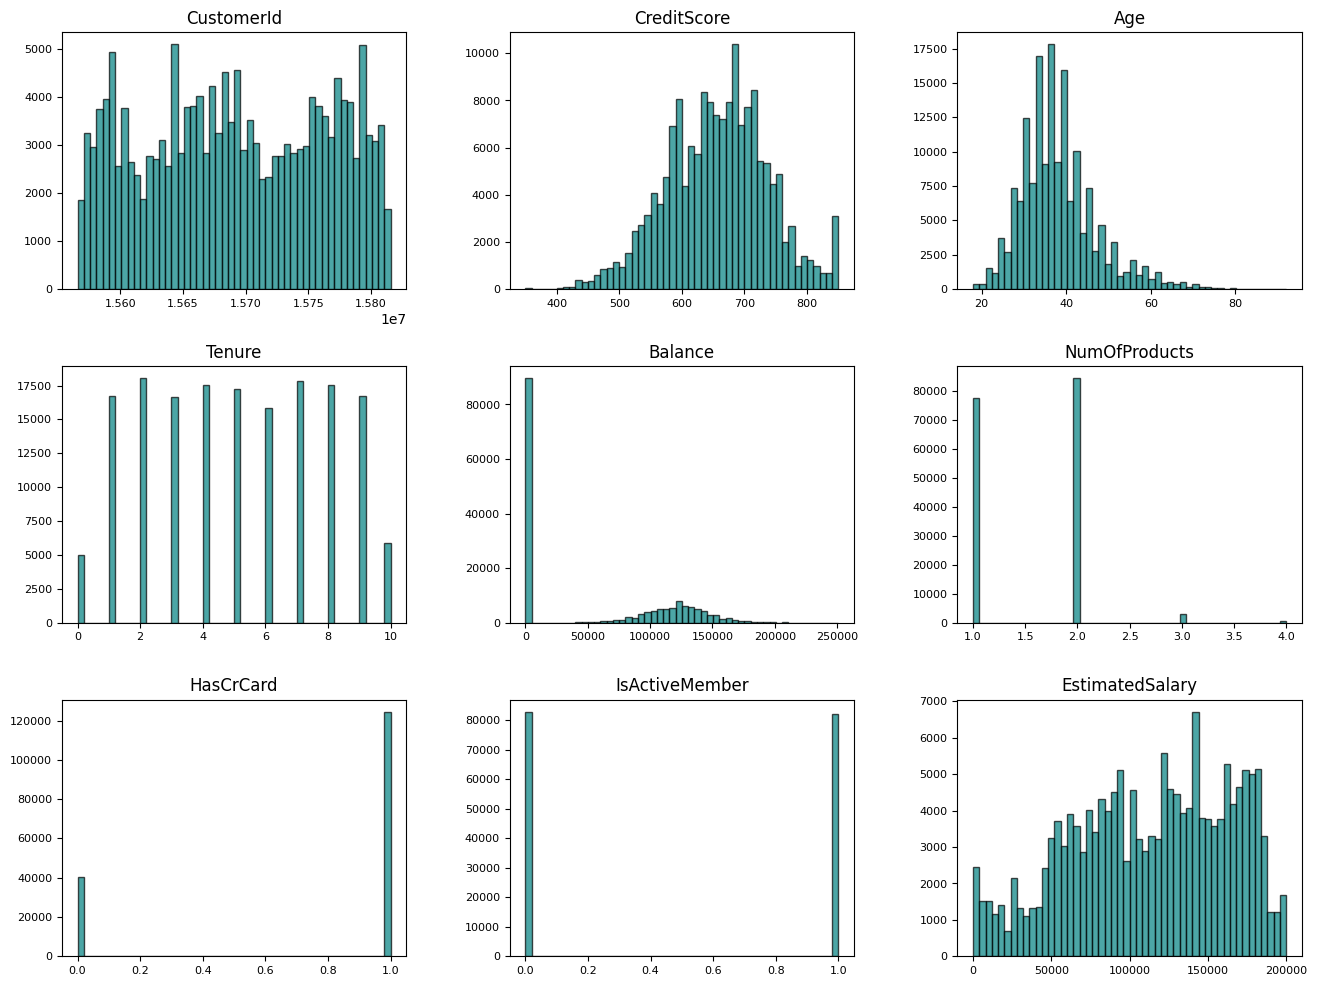

In [8]:
# Histogram of Continious columns
cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
ax = X[cols].hist(figsize=(16,12), bins=50, xlabelsize=8, ylabelsize=8, grid=False, color="teal", edgecolor='black', alpha=0.7);

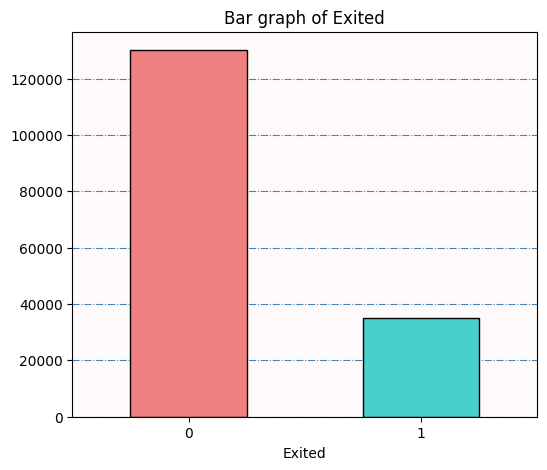

In [9]:
# Visualization of target (Transported) columns
target = "Exited"

fig, ax = plt.subplots(figsize=(6,5))
X[target].value_counts().sort_index().plot(kind='bar', ax=ax, color=["lightcoral", "mediumturquoise"], edgecolor='black')
ax.set_title(f"Bar graph of {target}")
ax.tick_params(axis='x', rotation=0)
ax.yaxis.grid(color='steelblue', linestyle="dashdot")
ax.set_facecolor(color="snow")
ax.set_axisbelow(True)

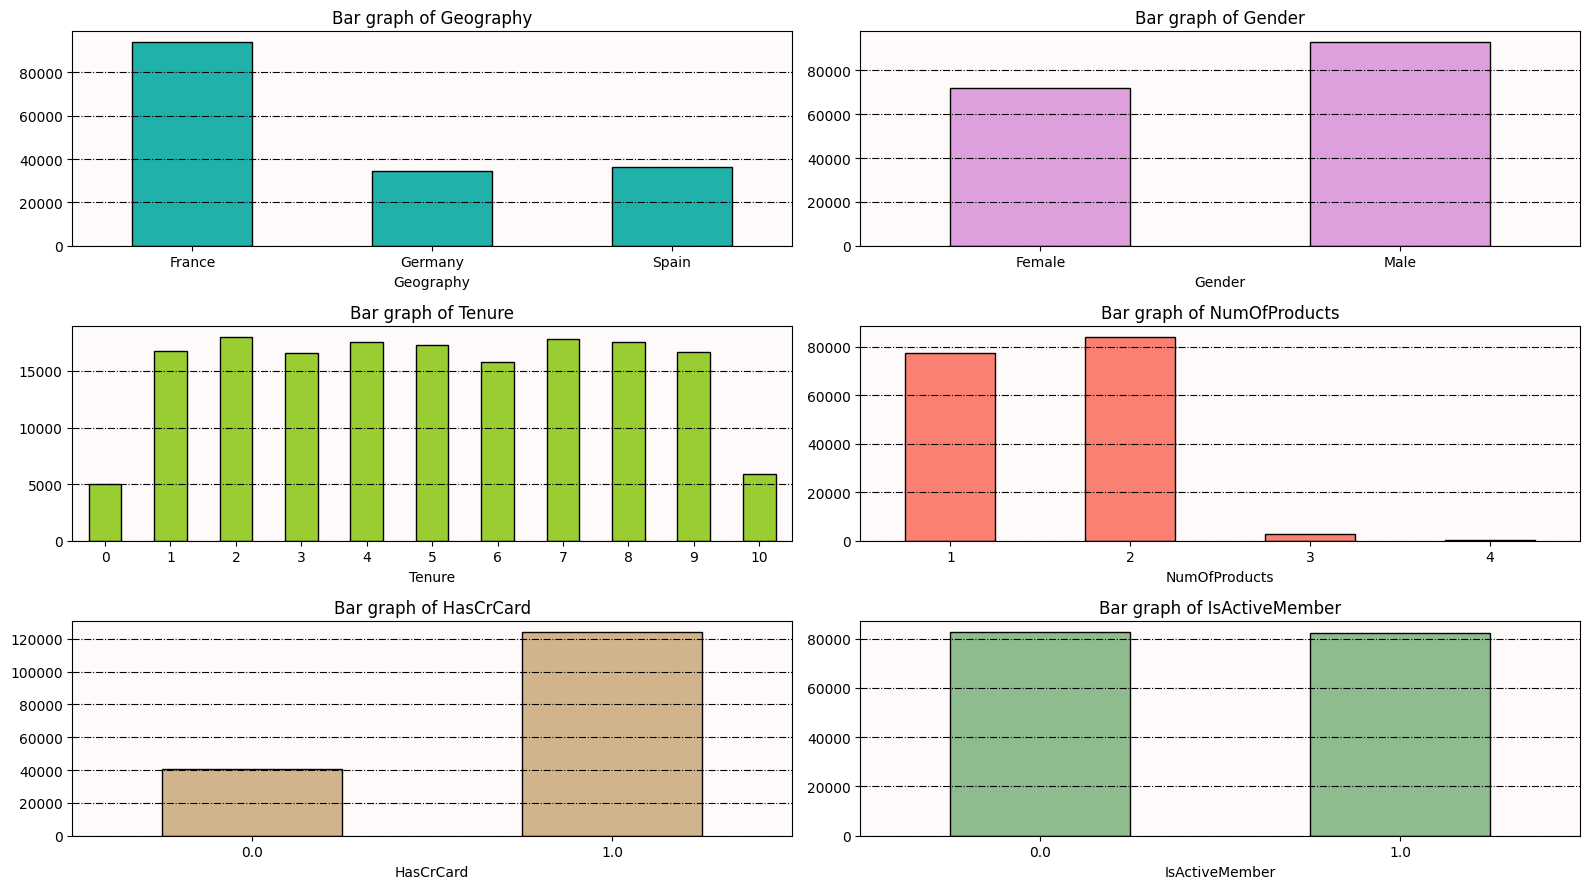

In [10]:
# Visualization of Catagorical columns
cols = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]
color_list = ["lightseagreen", "plum", "yellowgreen", "salmon", "tan", "darkseagreen"]

fig, ax = plt.subplots(figsize=(16,9), nrows=3, ncols=2)

for i in range(0, 3):
    for j in range(0, 2):
        X[cols[2*i + j]].value_counts().sort_index().plot(kind='bar', ax=ax[i,j], color=color_list[2*i+j], edgecolor='k')
        ax[i, j].set_title(f"Bar graph of {cols[2*i+j]}")
        ax[i, j].tick_params(axis='x', rotation=0)
        ax[i, j].yaxis.grid(color='k', linestyle="dashdot")
        ax[i, j].set_facecolor(color="snow")

plt.tight_layout()

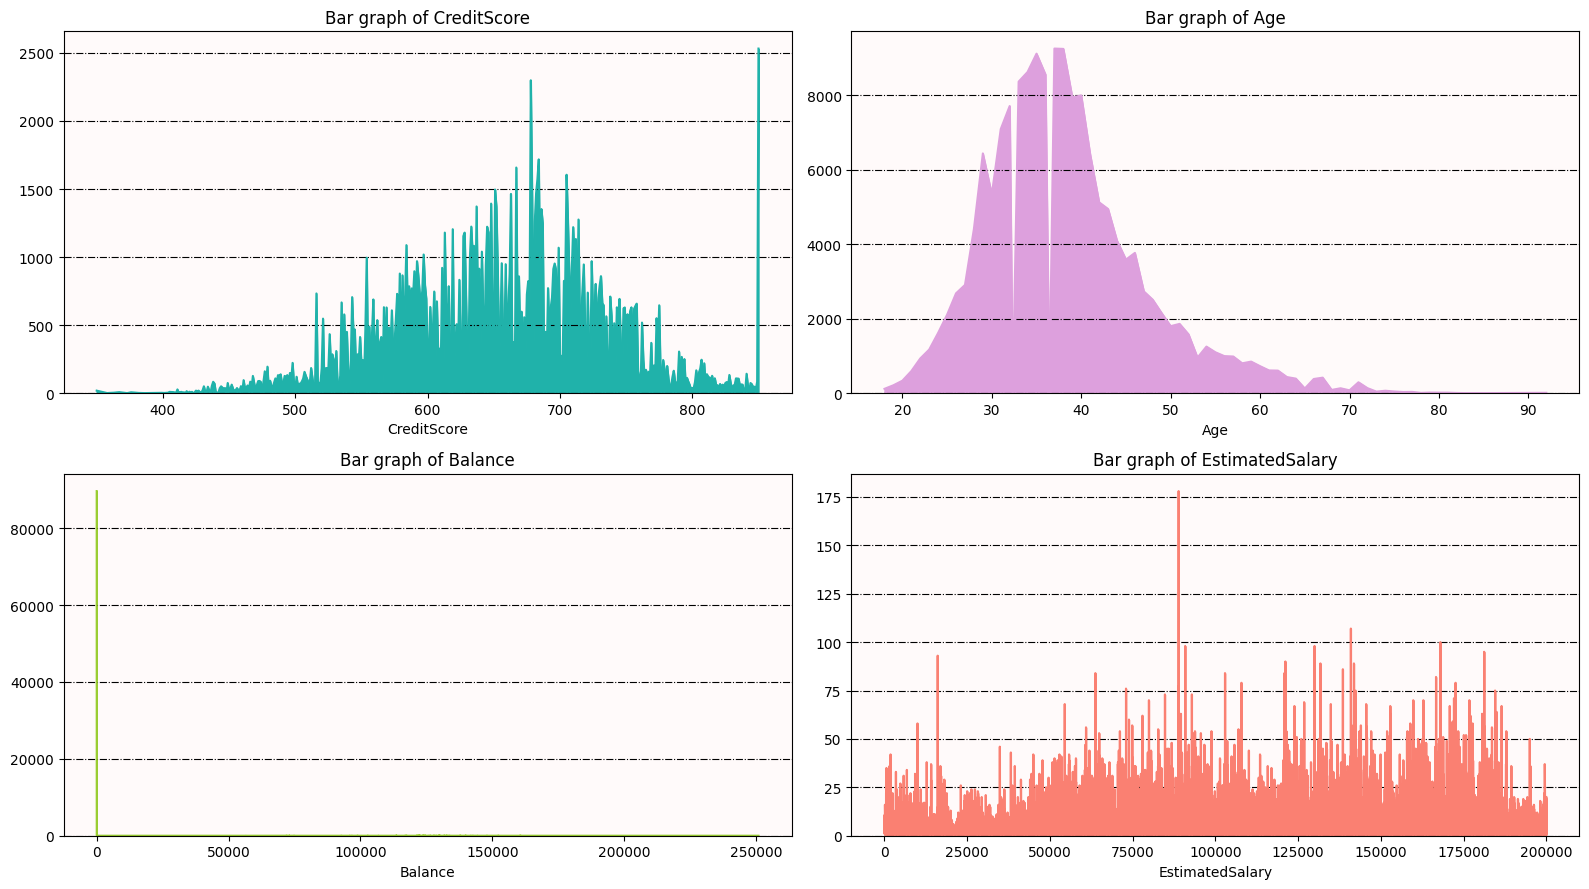

In [11]:
# Visualization of Numerical columns
cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
color_list = ["lightseagreen", "plum", "yellowgreen", "salmon", "tan", "darkseagreen"]

fig, ax = plt.subplots(figsize=(16,9), nrows=2, ncols=2)

for i in range(0, 2):
    for j in range(0, 2):
        X[cols[2*i + j]].value_counts().sort_index().plot(kind="area", ax=ax[i,j], color=color_list[2*i+j])
        ax[i, j].set_title(f"Bar graph of {cols[2*i+j]}")
        ax[i, j].tick_params(axis='x', rotation=0)
        ax[i, j].yaxis.grid(color='k', linestyle="dashdot")
        ax[i, j].set_facecolor(color="snow")

plt.tight_layout()

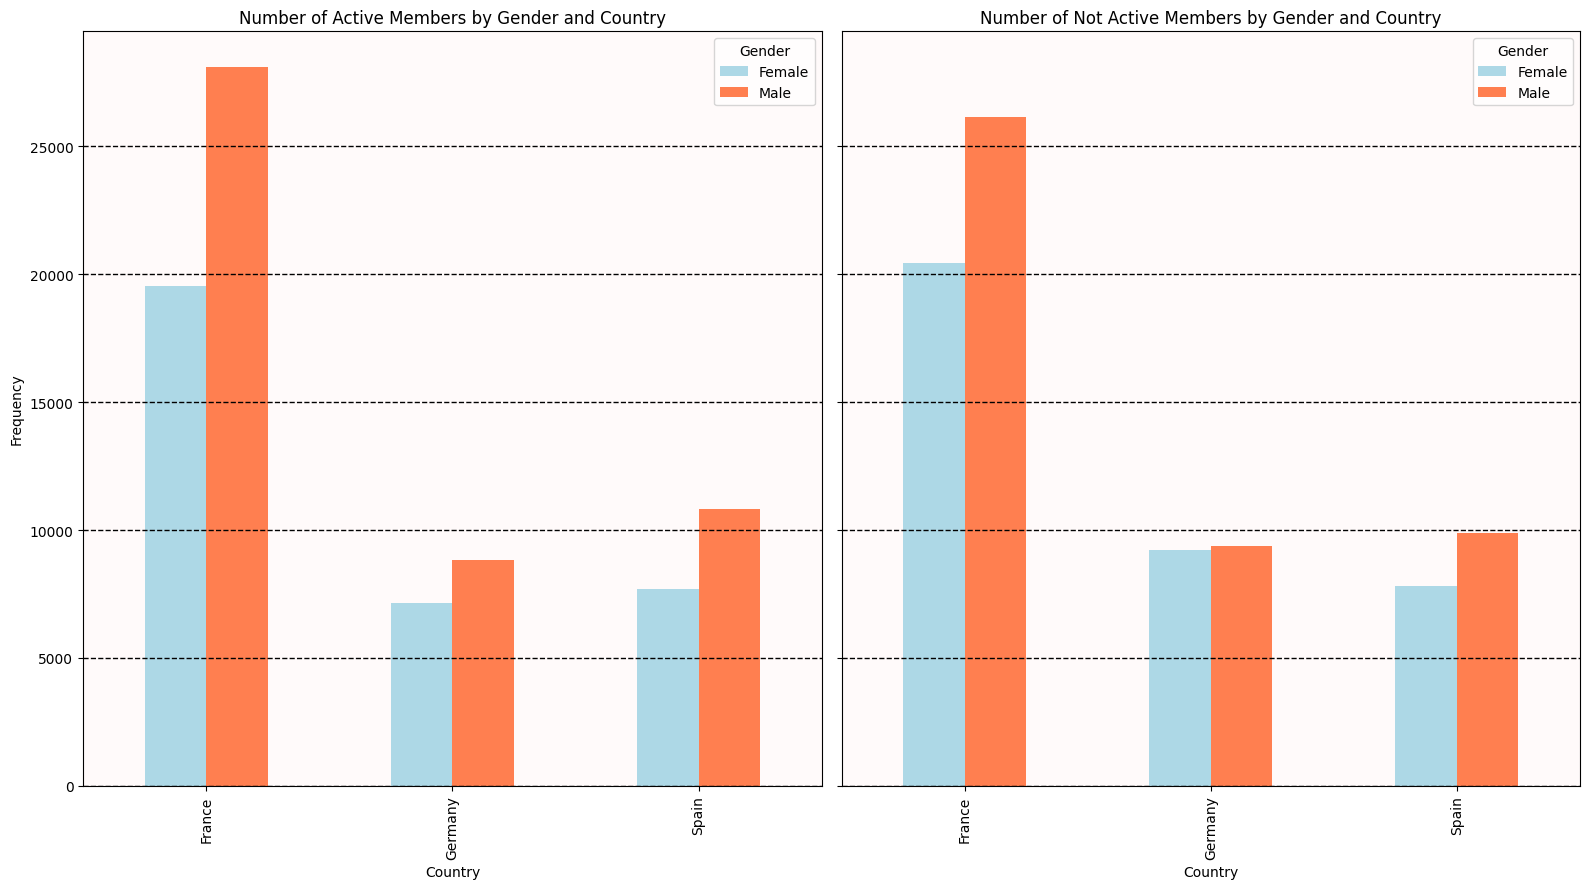

In [12]:
# Filter X for Gender, Geography & IsAcitveMember columns
gender_geo_active = X[['Gender', 'Geography', 'IsActiveMember']]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9), sharey='row')

active_counts = gender_geo_active[gender_geo_active['IsActiveMember'] == 1].groupby(['Geography', 'Gender']).size().unstack()
active_counts.plot(kind='bar', color=['lightblue', 'coral'], ax=ax[0])
ax[0].set_title('Number of Active Members by Gender and Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Frequency')
ax[0].yaxis.grid(color='k', linestyle='--', linewidth=1)
ax[0].legend(title='Gender')
ax[0].set_facecolor(color="snow")

not_active_counts = gender_geo_active[gender_geo_active['IsActiveMember'] == 0].groupby(['Geography', 'Gender']).size().unstack()
not_active_counts.plot(kind='bar', color=['lightblue', 'coral'], ax=ax[1])
ax[1].set_title('Number of Not Active Members by Gender and Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Frequency')
ax[1].yaxis.grid(color='k', linestyle='--', linewidth=1)
ax[1].legend(title='Gender')
ax[1].set_facecolor(color="snow")

plt.tight_layout()
plt.show()

# 4. Pre-Processing Data
* Calculating and listing down all the unique values and their counts for each columns in the dataframe `X`.

In [13]:
# Printing Unique values and their counts for each column
for i in X.columns:
    print(f"\n{i}")
    print(f"{X[i].unique()}")
    print(f"Count of Unique Values: {X[i].unique().shape[0]}")


id
[     0      1      2 ... 165031 165032 165033]
Count of Unique Values: 165034

CustomerId
[15674932 15749177 15694510 ... 15673571 15692656 15815050]
Count of Unique Values: 23221

Surname
['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']
Count of Unique Values: 2797

CreditScore
[668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 

## (i). Removing Unwanted Columns
* Columns `id`, `CustomerId`, and `Surname` do not cotribute in makeing the decision for the target variable.

In [14]:
X = X.drop(columns=["id", "CustomerId", "Surname"])

## (ii).Transforming Data
### (a). X_train
* Converting the catagorical columns (`Geography`, `Gender`, `Tenure`, `NumOfProducts`, `HasCrCard`, and `IsActiveMember`) into one-hot encoded form.
* We will split our data `X` into `X_train` and `y_train`.
* As our data is very biased we will apply `SMOTE`, to generate additional data to nullify the baisness in our data through `.fit_resample()` function.
* Applying `StandardScaler` to normalize the numberical columns of the data.
* Visualizing the final `X_train`.

In [15]:
# One-hot encoding
X = pd.get_dummies(X, columns=["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"], dtype=float)

In [16]:
# Seperating the target column from X_train
y_train = X["Exited"]
X_train = X.drop(columns=["Exited"])

X_train.head(5)

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,668,33.0,0.00,181449.97,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,627,33.0,0.00,49503.50,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,678,40.0,0.00,184866.69,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,581,34.0,148882.54,84560.88,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,716,33.0,0.00,15068.83,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
# Applying SMOTE to resample our data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(260226, 28) (260226,)


In [18]:
# Applying Standard-Scaler
cont_col = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
scaler = StandardScaler()
X_train[cont_col] = scaler.fit_transform(X_train[cont_col])

In [19]:
X_train

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,0.172934,-0.822956,-0.968615,1.353578,1.000000,0.0,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000
1,-0.364396,-0.822956,-0.968615,-1.265336,1.000000,0.0,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
2,0.303990,-0.027959,-0.968615,1.421394,1.000000,0.0,0.000000,0.000000,1.000000,0.00000,...,0.000000,1.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000
3,-0.967254,-0.709385,1.386229,-0.569506,1.000000,0.0,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
4,0.802003,-0.822956,-0.968615,-1.948806,0.000000,0.0,1.000000,0.000000,1.000000,0.00000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260221,-0.128495,-0.235366,-0.968615,-1.536582,0.413115,0.0,0.586885,0.000000,1.000000,0.00000,...,0.000000,0.0,0.413115,0.000000,0.586885,0.0,0.586885,0.413115,0.413115,0.586885
260222,0.094300,1.929048,1.337171,-0.646951,0.000000,1.0,0.000000,0.029555,0.970445,0.00000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000
260223,0.697158,1.515569,-0.968615,-0.945122,1.000000,0.0,0.000000,0.000000,1.000000,0.00000,...,0.965905,0.0,0.965905,0.034095,0.000000,0.0,0.000000,1.000000,1.000000,0.000000
260224,0.107406,2.561646,-0.968615,-1.780074,1.000000,0.0,0.000000,0.627347,0.372653,0.00000,...,0.000000,0.0,0.627347,0.372653,0.000000,0.0,0.000000,1.000000,1.000000,0.000000


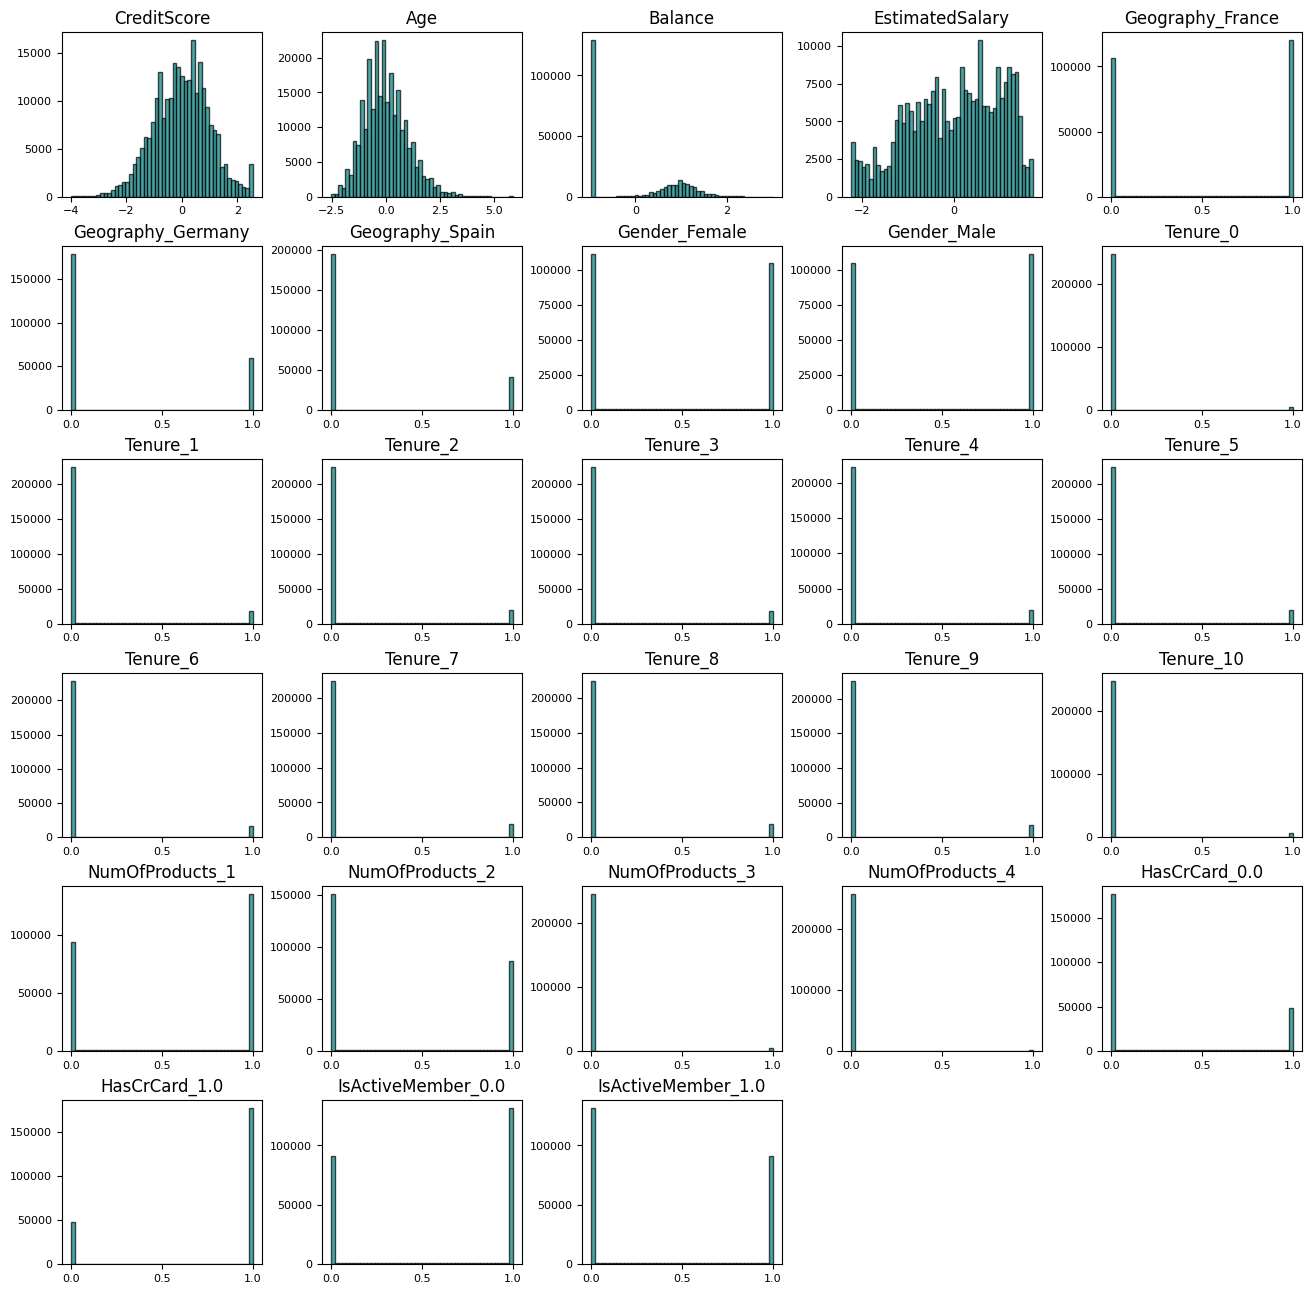

In [20]:
# Visualizing the final `X_train`.
ax = X_train.hist(figsize=(16,16), bins=50, xlabelsize=8, ylabelsize=8, grid=False, color="teal", edgecolor='black', alpha=0.7);

### (b). X_test
* Retriving `id` from `X_trian` and droping from `X_train` because it will not contribute in prediction.
* Perform similar transformation as we applied to `X_train`, so that we can fit it properly in the model.

In [21]:
# Read train Data file from the path
X_test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

# Retriving `id` from `X_trian` and droping from `X_train`
id_ = X_test["id"]
X_test.drop(columns=["id"], inplace=True)
X_test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [22]:
def test_transformer(df_X):
    
    # Removing unwanted columns and NaN valued records
    df_X.drop(columns=["CustomerId", "Surname"], inplace=True)

    # Converting catagorical columns to One-Hot Encoded form
    cols = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]
    df_X = pd.get_dummies(df_X, columns=cols, dtype=float)
    
    return df_X

In [23]:
X_test = test_transformer(X_test)

# Applying scaler transform
X_test[cont_col] = scaler.transform(X_test[cont_col])

In [24]:
X_test

,CreditScore,Age,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure_0,...,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0.0,HasCrCard_1.0,IsActiveMember_0.0,IsActiveMember_1.0
0,-0.901726,-1.958667,-0.968615,0.947219,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.369518,0.653467,-0.968615,-0.807916,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.015666,-0.709385,-0.968615,0.508677,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.343306,-0.482243,-0.968615,0.013452,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.273804,-0.255101,0.949386,0.519572,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-1.111415,-1.277241,0.867711,0.691392,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
110019,-1.045887,-0.482243,1.847288,-1.410662,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
110020,0.749580,-1.050099,-0.968615,-1.924619,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
110021,0.710263,-0.936528,-0.968615,0.904343,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# 5. Modeling
* We have used CatBoostClassifier as our prediction model.
* Fiting the model with our training data `X_train` and `y_train`.

In [25]:
# Creating CatBoostClassifier
model = CatBoostClassifier(iterations=1000)

# Fiting the model with our training data
model.fit(X_train, y_train, verbose=0)

In [26]:
# Predicting the output probabilities
y_pred = model.predict_proba(X_test)[:,1]
print(y_pred)

[0.02439389 0.84660953 0.02013396 ... 0.02401162 0.17406918 0.17566862]


# 6. Submission
* Storing `id` and `Exited` into a dictionary.

In [27]:
data = {'id': id_,
        'Exited': y_pred}

submission = pd.DataFrame(data)
submission.to_csv('/kaggle/working/submission.csv', index=False)
submission

,id,Exited
0,165034,0.024394
1,165035,0.846610
2,165036,0.020134
3,165037,0.231999
4,165038,0.357768
...,...,...
110018,275052,0.045570
110019,275053,0.148599
110020,275054,0.024012
110021,275055,0.174069
